## Численное решение уравнения Лапласа

In [1]:
import numpy as np

In [ ]:
def solve_laplace(M, epsilon, g1, g2, g3, g4):

    u = np.zeros((M + 1, M + 1))
    
    # Установка граничных условий
    for j in range(M + 1):
        u[0, j] = g1[j]  # u(0, y) = g1(y)
        u[M, j] = g2[j]  # u(1, y) = g2(y)
    for i in range(M + 1):
        u[i, 0] = g3[i]  # u(x, 0) = g3(x)
        u[i, M] = g4[i]  # u(x, 1) = g4(x)
    
    # Итерационный процесс
    for _ in range(1000):
        u_new = u.copy()
        max_diff = 0.0
        for i in range(1, M):
            for j in range(1, M):
                u_new[i, j] = 0.25 * (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1])
                max_diff = max(max_diff, abs(u_new[i, j] - u[i, j]))
                u = u_new
        
        if max_diff < epsilon:
            break
    
    # Возвращаем внутренние узлы в порядке [u11, u12, u13, u21, u22, u23, u31, u32, u33]
    return [u[i, j] for i in range(1, M) for j in range(1, M)]


M = 4
epsilon = 1e-7
g1 = [0., 0.0625, 0.25, 0.5625, 1.]
g2 = [1., 0.5625, 0.25, 0.0625, 0.]
g3 = [0., 0.0625, 0.25, 0.5625, 1.]
g4 = [1., 0.5625, 0.25, 0.0625, 0.]

result = solve_laplace(M, epsilon, g1, g2, g3, g4)
print(" ".join([f"{val:.7f}" for val in result]))
    
 

0.1718749 0.2812499 0.4218750 0.2812499 0.2812499 0.2812500 0.4218750 0.2812500 0.1718750


In [35]:
import matplotlib.pyplot as plt

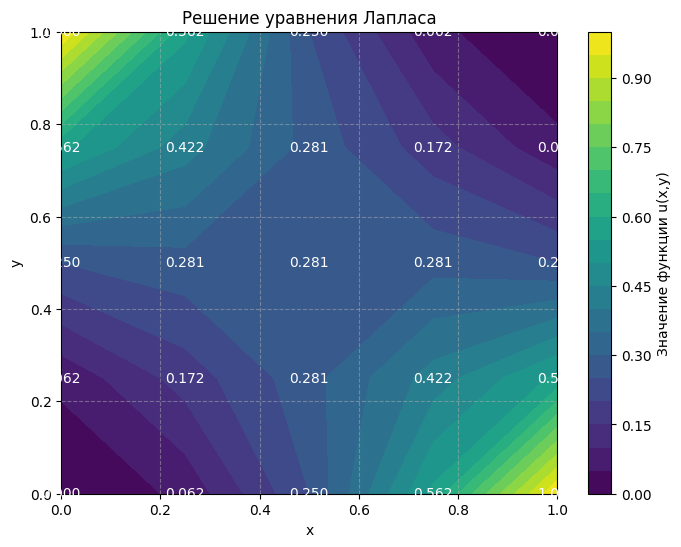

In [38]:
def plot_solution(u, M):
    """Визуализирует решение уравнения Лапласа в виде 2D графика"""
    
    x = np.linspace(0, 1, M+1)
    y = np.linspace(0, 1, M+1)
    X, Y = np.meshgrid(x, y)
    
    # Настройка графика
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, u, levels=20, cmap='viridis')
    plt.colorbar(label='Значение функции u(x,y)')
    plt.title('Решение уравнения Лапласа')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Добавляем аннотации со значениями
    for i in range(M+1):
        for j in range(M+1):
            plt.text(x[i], y[j], f'{u[j,i]:.3f}', 
                    ha='center', va='center', color='white')
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

M = 4
v = np.array([
    [0.0, 0.0625, 0.25, 0.5625, 1.0],     # g1 (левая граница)
    [0.0625, result[0], result[1], result[2], 0.5625],
    [0.25, result[3], result[4], result[5], 0.25],
    [0.5625, result[6], result[7], result[8], 0.0625],
    [1.0, 0.5625, 0.25, 0.0625, 0.0]       # g2 (правая граница)
])

plot_solution(v, M)